In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as pltpatch

## 1. Monte Carlo

### 1.1 $\pi$ Calculation



In [ ]:
def moneteCarloPI(times: int, axes = None, plot = False):
    radius = 1
    inCircle = 0
    if(plot):
        axes.add_artist(pltpatch.Circle((0, 0), 1, fill = False))

    for i in range(times):
        x, y = [random.random() * 2 * radius - radius for _ in range(2)]
        inCircle += (x ** 2 + y ** 2 <= 1)

        if(plot):
            axes.scatter(x, y, color = 'blue', s = 5)
    return (inCircle / times * 4)



times: 10 - estimated PI: 4.0
times: 100 - estimated PI: 3.28
times: 1000 - estimated PI: 3.196
times: 2000 - estimated PI: 3.182
times: 5000 - estimated PI: 3.1704
times: 10000 - estimated PI: 3.1472
times: 50000 - estimated PI: 3.13808
times: 100000 - estimated PI: 3.13964


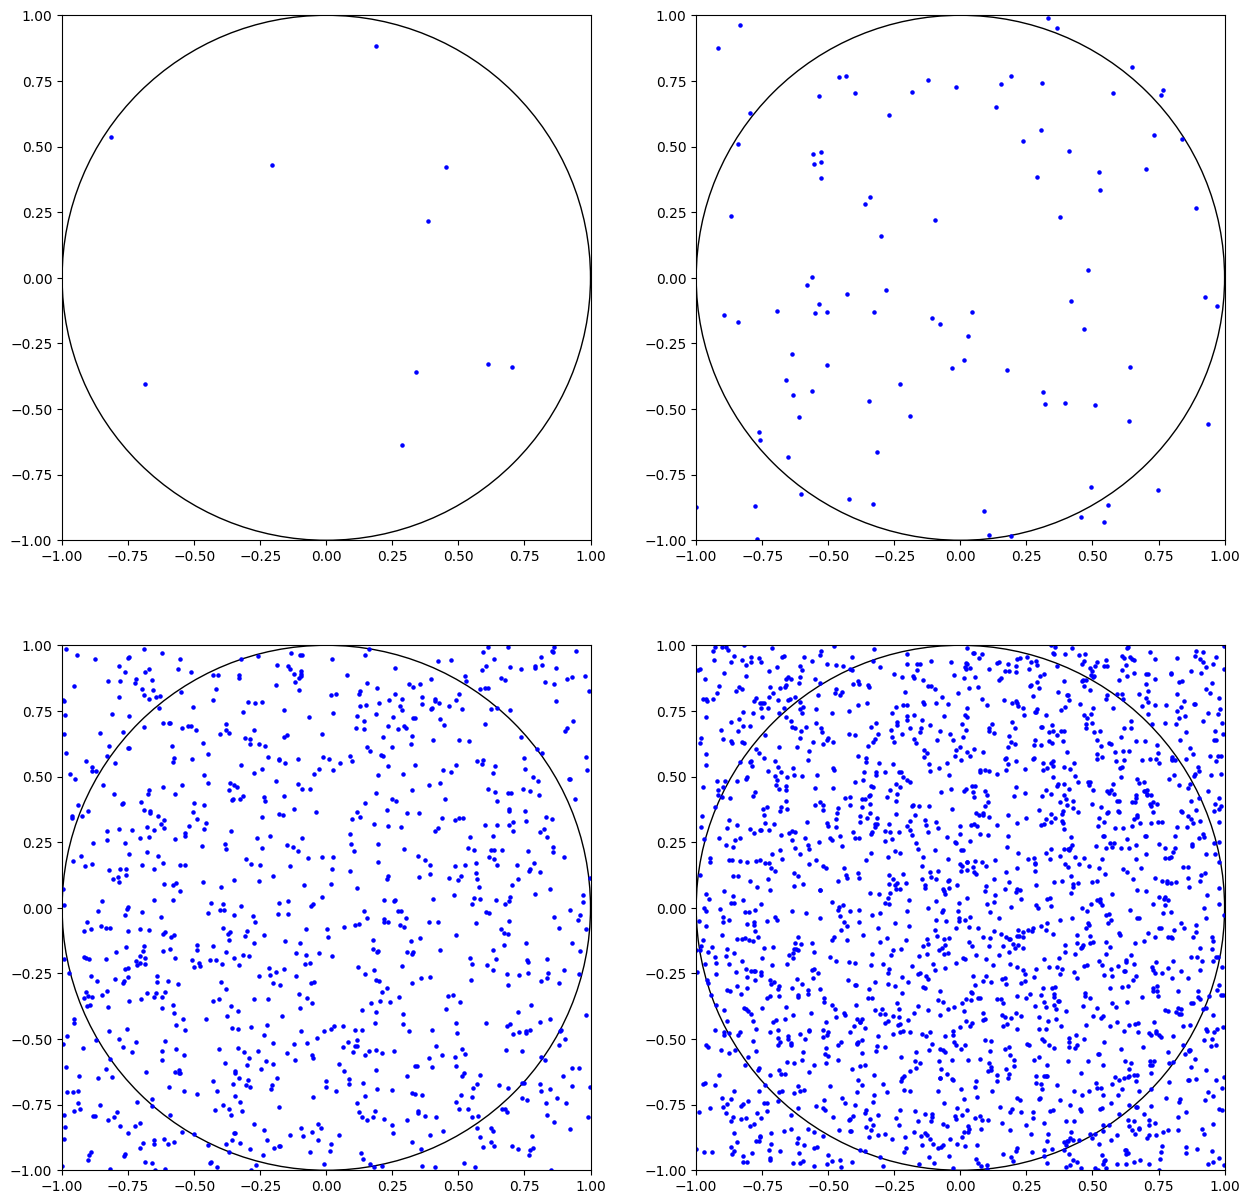

In [ ]:
times = [10, 100, 1000, 2000]
figure, axes = plt.subplots(nrows = 2, ncols = 2 ,figsize = (15, 15))
plt.setp(axes, xlim = [-1, 1], ylim = [-1, 1])

for i in range(len(times)):
    print(f'times: {times[i]} - estimated PI: {moneteCarloPI(times[i], axes[i // 2][i % 2], True)}')

times = [5000, 10000, 50000, 100000]
for time in times:
    print(f'times: {time} - estimated PI: {moneteCarloPI(time)}')

plt.show()


In [ ]:
import numpy as np
steps = 100
upper_bound = 5000
sample_sizes = [100 * i for i in range(1, upper_bound, steps)]

In [ ]:
def plot_pi_error_values(sample_sizes, errors):
    plt.figure(figsize=(20, 10))
    plt.title("Error of π using Monte Carlo method")
    plt.xlabel("Number of Points")
    plt.ylabel("Approximation π Error")
    plt.plot(sample_sizes, errors)

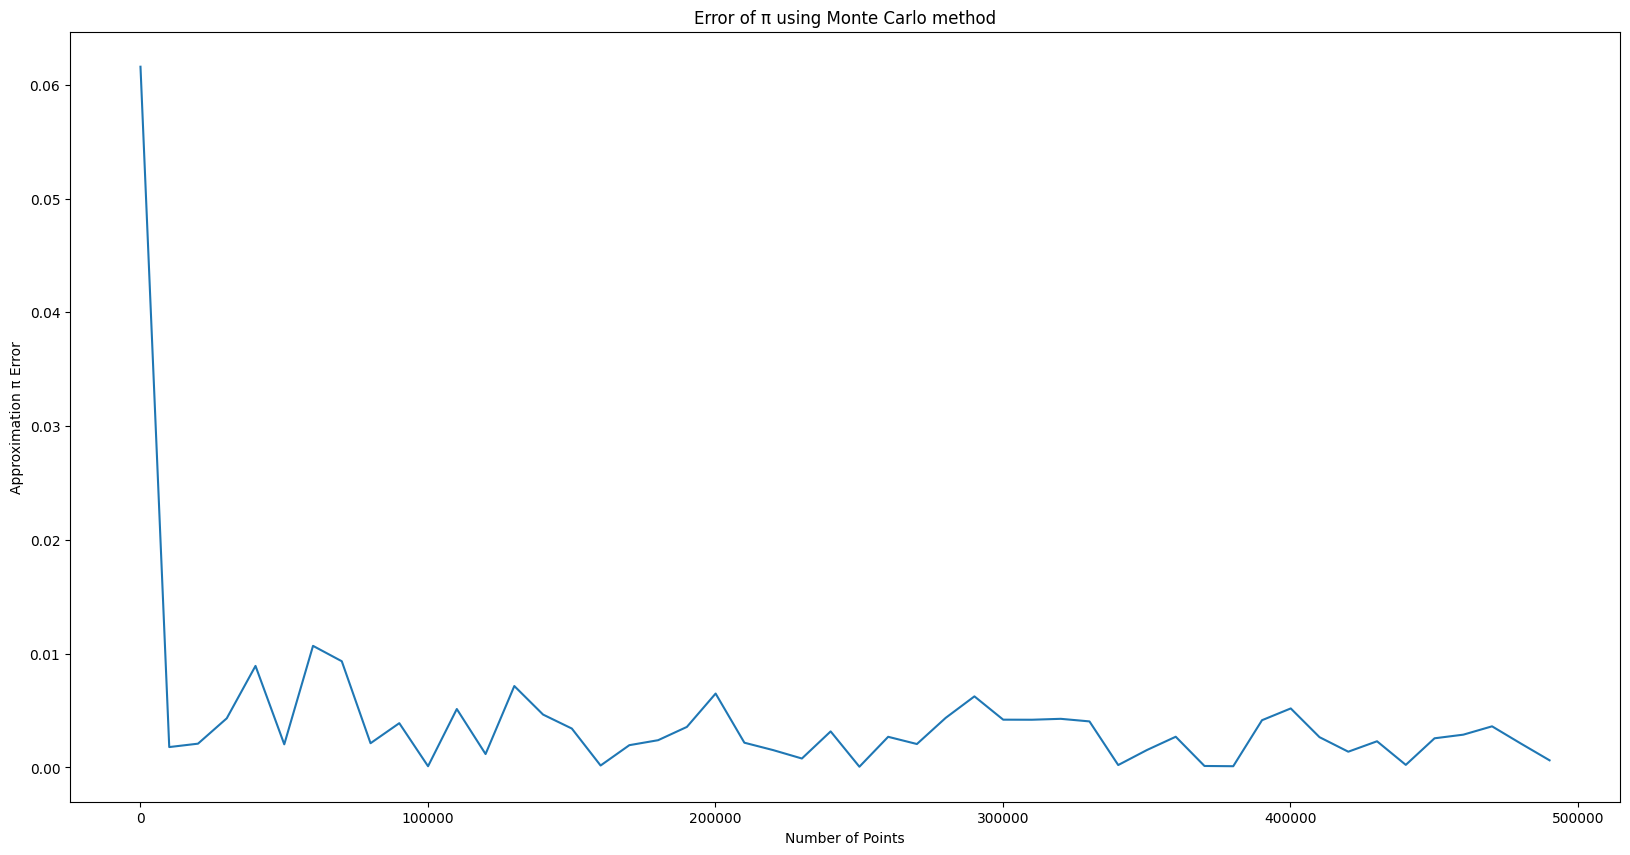

In [ ]:

pi_values = []
errors = []

for sample_size in sample_sizes:
    estimated_pi_value = moneteCarloPI(sample_size, plot=False)
    pi_values.append(estimated_pi_value)
    errors.append(abs(np.pi - estimated_pi_value))

plot_pi_error_values(sample_sizes, errors)


The error increases and decreases in a range, which becomes smaller as the number of tests increases.

In [ ]:
def plot_estimated_pi_values(sample_sizes, pi_values):
    plt.figure(figsize=(20, 10))
    plt.plot(sample_sizes, pi_values, marker='o', label="Approximated pi")
    plt.axhline(y=np.pi, color='r', linestyle='-', label="pi")
    plt.xlabel("times")
    plt.ylabel("Approximated pi")
    plt.title("Monte Carlo Approximation of pi")
    plt.grid(True)
    plt.legend()
    plt.show()

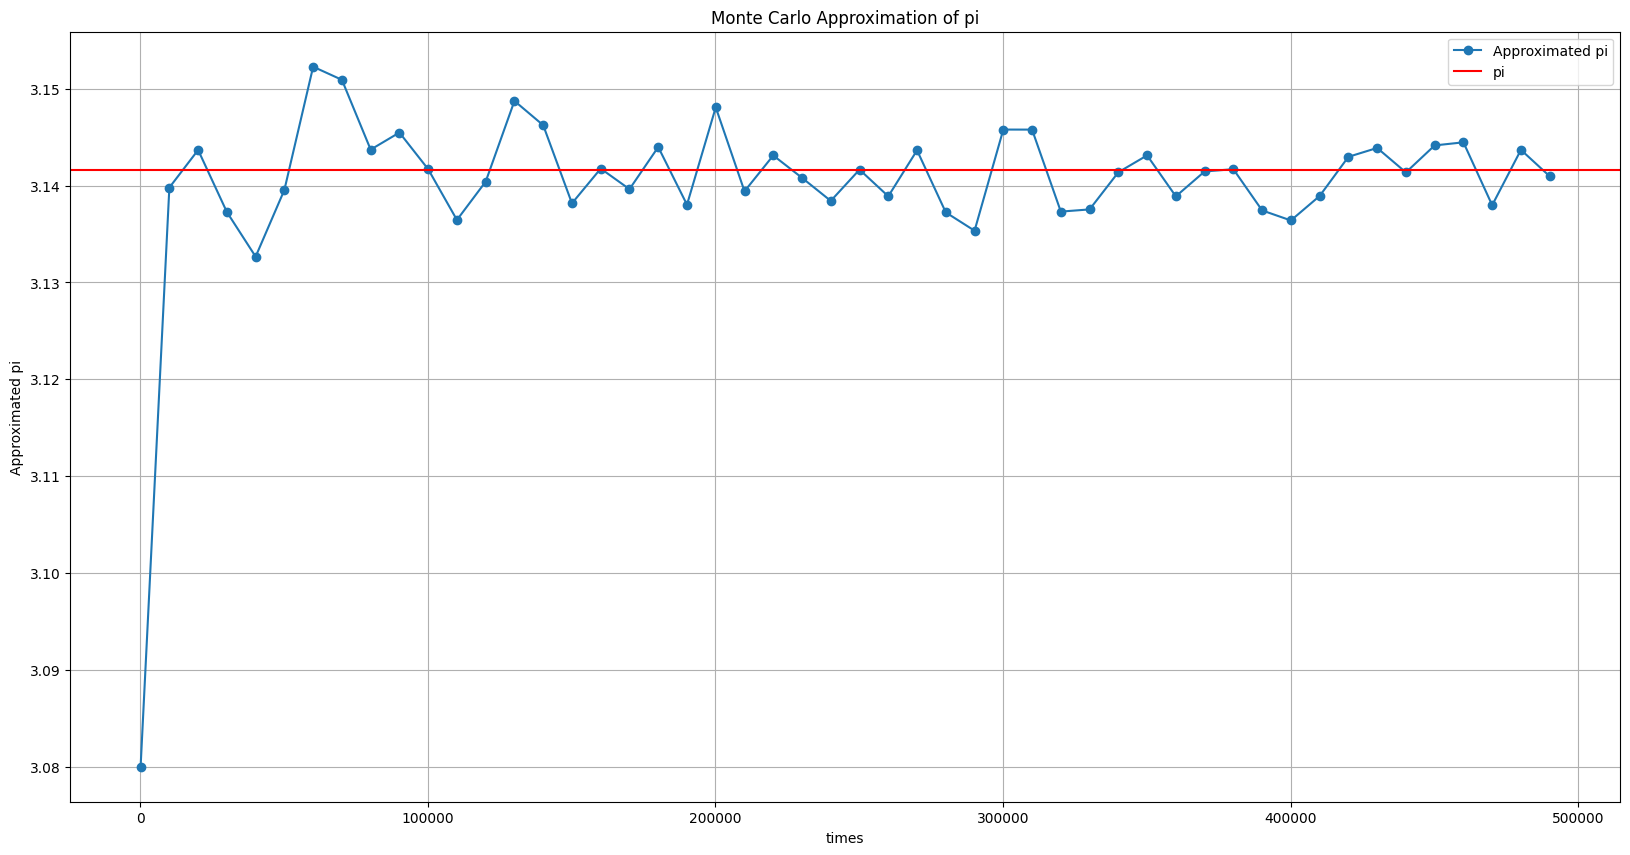

In [ ]:
plot_estimated_pi_values(sample_sizes, pi_values)

As the number of trials increases, pi converges to a value.

### 1.2 Mensch Game

As we can see, the 1st player has the most winning probability, and 2nd, 3rd and 4th player has the next highest winning probability in order.

We can infer that winning probability relates with turn in Mensch game. The earlier the turn is, the more probable player to win.

In [ ]:
class Mensch:
    def __init__(self, nBoard = 40, required_6_ToPlay = True, prizeFor_6 = True, enableHit = True) -> None:
        assert(nBoard % 4 == 0)
        self.n = nBoard
        self._first6 = required_6_ToPlay
        self._prize6 = prizeFor_6
        self._hit = enableHit

        self.remains: list[int]
        self.canPlay: list[int]
        self.remains = [self.n] * 4
        self.canPlay = [False] * 4

    def _reset_player(self, player: int):
        self.canPlay[player] = False
        self.remains[player] = self.n

    def reset(self):
        for i in range(4):
            self._reset_player(i)

    def _is_finished(self):
        for i in range(4):
            if(self.remains[i] == 0):
                return True
        return False

    def _get_winner(self):
        for i in range(4):
            if(self.remains[i] == 0):
                return i
        return -1

    def _check_hit(self, player: int):
        for i in range(4):
            if(i == player):
                continue
            difmod = (player - i) % 4
            if((self.remains[player] - self.remains[i]) == difmod * (self.n // 4) or
               (self.remains[player] - self.remains[i]) == (difmod - 4) * (self.n // 4)):
                self._reset_player(i)
                return

    def _move(self, player: int, moves: int):
        if(self.remains[player] >= moves):
            self.remains[player] -= moves
            if(self._hit):
                self._check_hit(player)

    def _roll(self):
        i = 0
        while(i < 4):
            dice = random.randint(1, 6)
            if(dice == 6):
                self.canPlay[i] = True
                self._move(i, dice)
                if(self._prize6):
                    continue
            elif(not self._first6 or self.canPlay[i]):
                self._move(i, dice)
            i += 1


    def play(self) -> int:
        while(not self._is_finished()):
            self._roll()
        return self._get_winner()



class MonteCarloMensch:
    def __init__(self, times: int, mensch: Mensch) -> None:
        self.mensch = mensch
        self.wins = [0] * 4
        self.winProbs = [0] * 4
        self.times = times

    def _eval(self):
        for i in range(4):
            self.winProbs[i] = self.wins[i] / self.times

    def simulate(self):
        for i in range(self.times):
            self.mensch.reset()
            winner = self.mensch.play()
            self.wins[winner] += 1

    def report(self):
        self._eval()
        print(self.winProbs)

mencsh = Mensch(
    nBoard = 40,
    required_6_ToPlay = True,
    prizeFor_6 = True,
    enableHit = True
)
monteCarloSim = MonteCarloMensch(100000, mencsh)
monteCarloSim.simulate()
monteCarloSim.report()

[0.25958, 0.255, 0.24585, 0.23957]


Probabilities are leaning towards a one-fourth chance that randomness will prevail.

But the probability of winning is higher for the player who starts earlier.

$P(Player1) > P(Player2) > P(Player3) > P(Player4) $



## 2. Central Limit Theorem(CLT)



In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import astropy.visualization as astplt

class DistCLT:
    def __init__(self, size):
        self.mean: float
        self.SE: float
        self.s: float
        self.meanSamples: list[float]
        self.size = size

    def get_99_range(self):
        return [self.mean - 3 * self.SE, self.mean + 3 * self.SE]

    def get_mean(self):
        return self.mean

    def get_SE(self):
        return self.SE

    def get_s(self):
        return self.s

    def run(self):
        self.meanSamples = []
        for i in range(1000):
            samples = self.get_samples()
            self.meanSamples.append(samples.mean())

    def plot_clt_norm(self, ax = plt):
        start, stop = self.get_99_range()
        x = np.arange(start, stop, 0.01)
        y = stats.norm.pdf(x, self.mean, self.SE)
        ax.text(x.min(), y.max(), f'n: {self.size}, SE: {self.SE:.2f}', color='purple')
        ax.plot(x, y, 'red')

    def plot_sampling_hist(self, ax = plt):
        ax.hist(
            self.meanSamples,
            bins = 'scott',
            alpha = 0.5,
            ec = 'black',
            density = True
        )

class PoissonDistCLT(DistCLT):
    def __init__(self, lmbda, size):
        super().__init__(size)
        self.lmbda = lmbda
        self.mean = self.lmbda
        self.s = np.sqrt(self.lmbda)
        self.SE = np.sqrt(self.lmbda) / np.sqrt(self.size)

    def get_samples(self):
        return np.random.poisson(lam=self.lmbda, size=self.size)

class ExpDistCLT(DistCLT):
    def __init__(self, scale, size):
        super().__init__(size)
        self.scale = scale
        self.mean =  self.scale
        self.s = self.scale
        self.SE = self.scale / np.sqrt(self.size)

    def get_samples(self):
        return np.random.exponential(scale=self.scale, size=self.size)

class GeomDistCLT(DistCLT):
    def __init__(self, p, size):
        super().__init__(size)
        self.p = p
        self.mean = 1 / self.p
        self.s = (np.sqrt(1 - self.p) / self.p)
        self.SE = (np.sqrt(1 - self.p) / self.p) / np.sqrt(self.size)

    def get_samples(self):
        return np.random.geometric(p=self.p, size=self.size)


In [ ]:
nSamples = [30, 300, 3000]

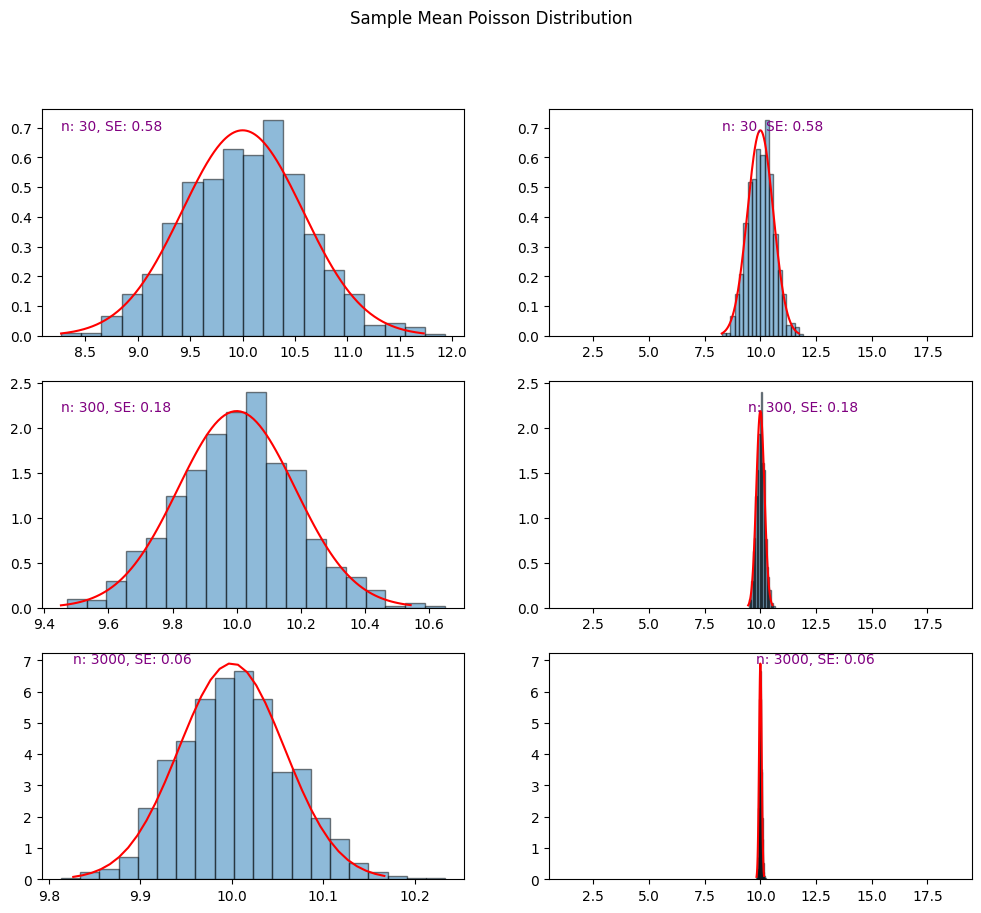

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12,10))
fig.suptitle('Sample Mean Poisson Distribution')
for i in range(3):
    dist = PoissonDistCLT(lmbda=10, size=nSamples[i])
    dist.run()
    dist.plot_clt_norm(axes[i][0])
    dist.plot_sampling_hist(axes[i][0])
    dist.plot_clt_norm(axes[i][1])
    dist.plot_sampling_hist(axes[i][1])
    plt.setp(axes[i][1], xlim = [dist.get_mean() - 3 * dist.get_s(), dist.get_mean() + 3 * dist.get_s()])
plt.show()

We can see as we increase size of sample, the standard deviation decreases. The observation is more robust and the distribution is getting more like a pulse function in the point of mean. The mean of CLT distribution is equal to the mean of the population distribution. And the mean of samples is also equal to mean of population.

Left side -> Shows normality and x gets smaller.

Right side -> Gets closer to the Impulse function.

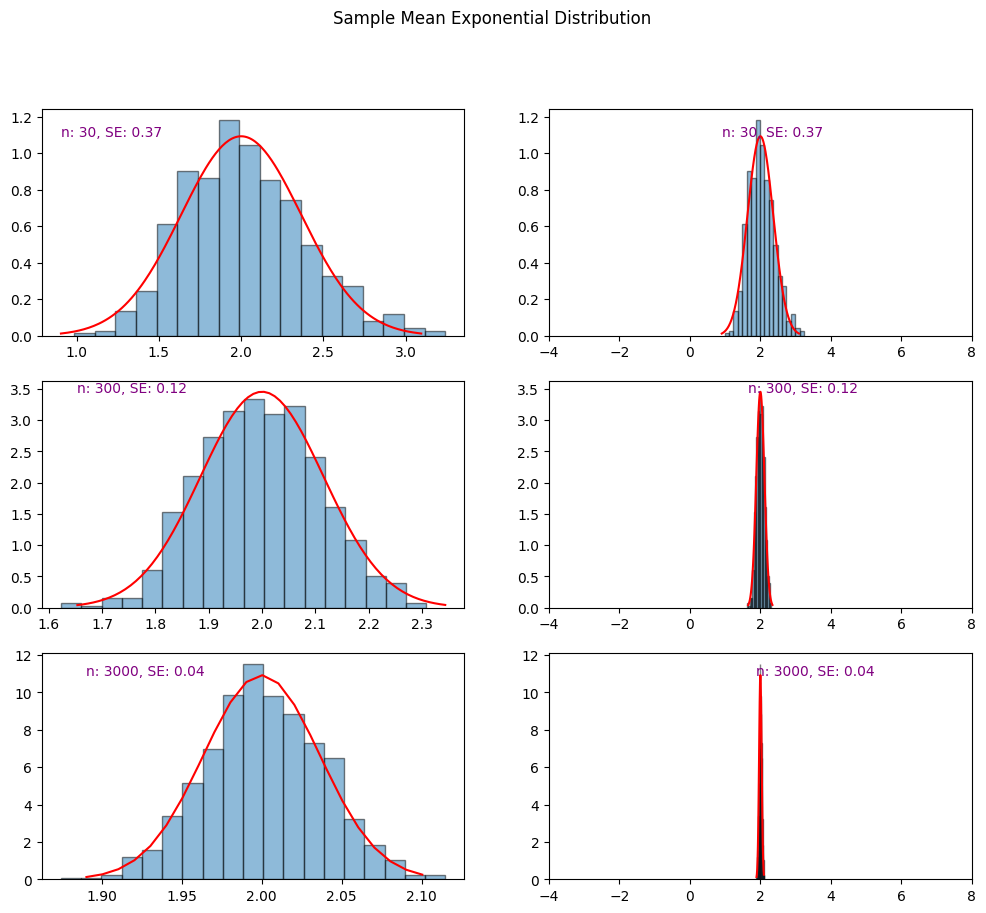

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12,10))
fig.suptitle('Sample Mean Exponential Distribution')
for i in range(3):
    dist = ExpDistCLT(scale=2, size=nSamples[i])
    dist.run()
    dist.plot_clt_norm(axes[i][0])
    dist.plot_sampling_hist(axes[i][0])
    dist.plot_clt_norm(axes[i][1])
    dist.plot_sampling_hist(axes[i][1])
    plt.setp(axes[i][1], xlim = [dist.get_mean() - 3 * dist.get_s(), dist.get_mean() + 3 * dist.get_s()])
plt.show()


# New Section

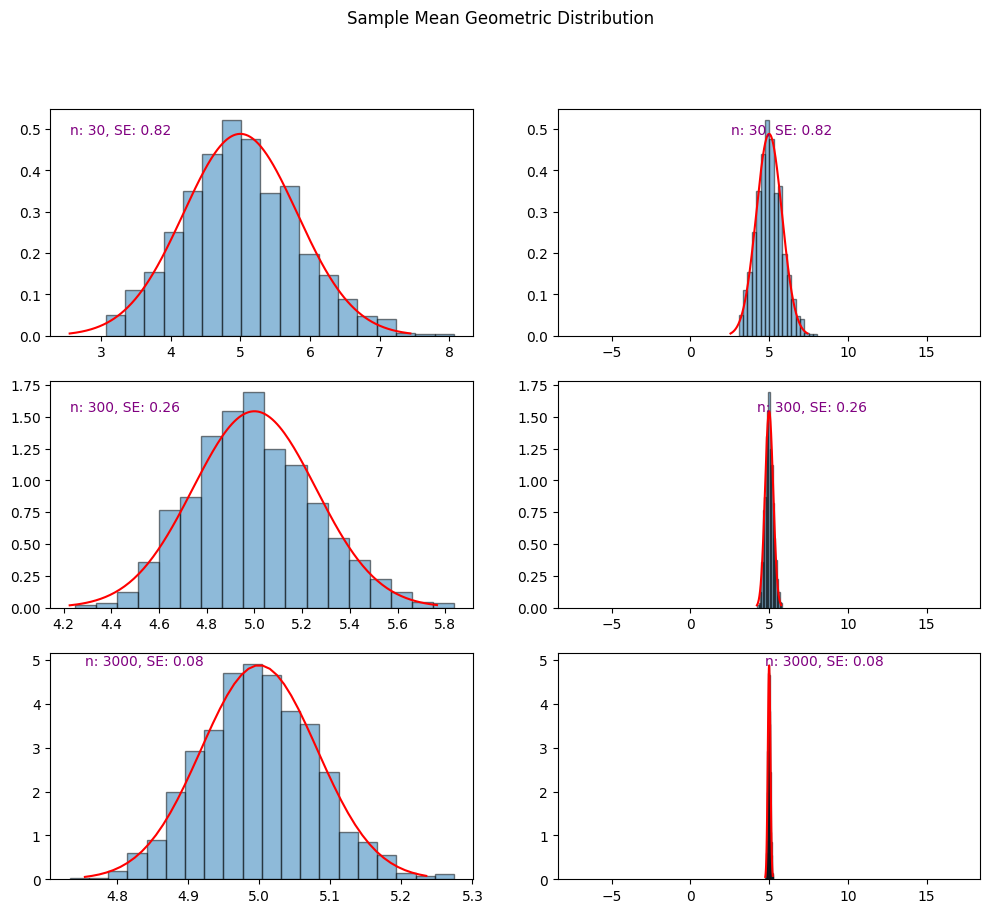

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12,10))
fig.suptitle('Sample Mean Geometric Distribution')
for i in range(3):
    dist = GeomDistCLT(p=0.2, size=nSamples[i])
    dist.run()
    dist.plot_clt_norm(axes[i][0])
    dist.plot_sampling_hist(axes[i][0])
    dist.plot_clt_norm(axes[i][1])
    dist.plot_sampling_hist(axes[i][1])
    plt.setp(axes[i][1], xlim = [dist.get_mean() - 3 * dist.get_s(), dist.get_mean() + 3 * dist.get_s()])
plt.show()

## 3. Hypothesis Testing

### 3.1 Unfair Coin


In [ ]:
def unfair_coin(p: float, n: int):
    assert 0 <= p <= 1
    return np.random.choice([0, 1], size=n, p=[1 - p, p])


Ns = [30, 100, 1000]
biases = [0.55, 0.6, 0.65]
for bs in biases:
  print(f"For bias is {bs}:")
  for n in Ns:
      samples = unfair_coin(bs, n)
      x_bar = samples.mean()
      u0 = 0.5
      SE = np.sqrt(u0 * (1 - u0) / n)
      z_score = (x_bar - u0) / SE
      p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))
      print(f'n: {n}, z-score: {z_score}, p-value: {p_value}')
      if p_value > 0.05:
        print('coin is fair')
      else:
        print('coin is unfair')
  print('\n\n')


For bias is 0.55:
n: 30, z-score: 1.0954451150103321, p-value: 0.27332167829229803
coin is fair
n: 100, z-score: 0.20000000000000018, p-value: 0.8414805811217938
coin is fair
n: 1000, z-score: 2.909295447354912, p-value: 0.0036224435050637993
coin is unfair



For bias is 0.6:
n: 30, z-score: 0.0, p-value: 1.0
coin is fair
n: 100, z-score: 0.40000000000000036, p-value: 0.6891565167793514
coin is fair
n: 1000, z-score: 6.704028639556964, p-value: 2.0275114920309534e-11
coin is unfair



For bias is 0.65:
n: 30, z-score: 0.36514837167011066, p-value: 0.7150006546880894
coin is fair
n: 100, z-score: 3.400000000000001, p-value: 0.0006738585313537104
coin is unfair
n: 1000, z-score: 10.30902517214892, p-value: 0.0
coin is unfair





The larger the sample size, the more accurate the test becomes, and we can give a more confident opinion.

### 3.2 Job Placement

To perfom t-test, first we define null hypotheses and alternative hypotheses respectively, We want to see if having job has a negative effect on GPA, so the null hypotheses is $GPA_{job} \le GPA_{no job}$ but it is better to consider the null hypotheses an equation so:

$ H_{0}: \bar{x_{1}} = \bar{x_{2}}$

$ H_{A}: \bar{x_{1}} \ne \bar{x_{2}}$

- $\bar{x_{1}}$ is the mean of gpa for students who has `placed` status in `job placement`.

- $\bar{x_{1}}$ is the mean of gpa for students who has `not placed` status in `job placement`.

As it is mentioned, the `variance` of two groups are identical. And we consider these two groups are independent.


$$ t = \frac{\bar{x_{1}} - \bar{x_{2}}}{s_{p}\sqrt{\frac{1}{n_{1}} + \frac{1}{n_{2}}}}$$

$$ s_{p} = \sqrt{\frac{(n_{1} - 1)s_{1}^{2} + (n_{2} - 1)s_{2}^{2}}{n_{1} + n_{2} - 2}} $$

$\bar{x_{1}}$ = Mean of first sample

$\bar{x_{2}}$ = Mean of second sample

$n_{1}$ = Sample size (i.e., number of observations) of first sample

$n_{2}$ = Sample size (i.e., number of observations) of second sample

$s_{1}$ = Standard deviation of first sample

$s_{2}$ = Standard deviation of second sample

$s_{p}$ = Pooled standard deviation


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('job_placement.csv')

Saving job_placement.csv to job_placement.csv


In [ ]:
a = data[data['placement_status'] == 'Placed']['gpa']
b = data[data['placement_status'] == 'Not Placed']['gpa']

In [ ]:
degree_of_freedom = a.shape[0] + b.shape[0] - 2
s = np.sqrt((a.var() * (a.shape[0] - 1) + b.var() * (b.shape[0] - 1)) / (degree_of_freedom))
t_statistic = (a.mean() - b.mean()) / (s * np.sqrt(1 / a.shape[0] + 1 / b.shape[0]))
p_value = stats.t.sf(t_statistic, df = degree_of_freedom) * 2

print('degree of freedom:', degree_of_freedom)
print('T-statistic:', t_statistic)
print('p-value:', p_value)

degree of freedom: 698
T-statistic: 5.105318956468754
p-value: 4.263644494096789e-07


In [ ]:
t_stat, p_value = stats.ttest_ind(a, b)
print("Test statistic:", t_stat)
print("p-value:", p_value)

Test statistic: 5.105318956468754
p-value: 4.263644494096789e-07


Assumption: Having a job does not affect the grade

Because the p-value is below 5 percent we can deny that having a job does not affect the course.


## Questions

**1. Read a little bit about the applications of Monte Carlo Simulation in real life. What are some of these applications?**

Monte Carlo simulations find extensive applications across diverse fields such as finance, engineering, physics, operations research, computer graphics, environmental modeling, computational biology, and telecommunications. These simulations leverage random sampling and statistical modeling to approximate solutions to quantitative problems, explore the behavior of complex systems, optimize processes, analyze risks, and incorporate uncertainty, making them invaluable in scenarios where analytical solutions are intractable.

**2. How does the sample size affect your plots in part 2(CLT)? What can you understand from these plots?**

In the plots generated by the code, increasing the sample size has a noticeable impact on the distribution of sample means and its alignment with the Central Limit Theorem (CLT). With larger sample sizes, the standard error (SE) decreases, as evident from the printed text on the plots. Additionally, the histogram of sample means becomes more concentrated and narrower around the true population mean, demonstrating the convergence of the distribution to a normal shape as predicted by the CLT.

The plots clearly illustrate the key principles of the CLT. For larger sample sizes, the histogram closely resembles the overlaid normal distribution curve, indicating the normality of the distribution of sample means. Furthermore, the spread or variance of this distribution decreases as the sample size increases, resulting in a more concentrated and narrower histogram. These observations align with the CLT, which states that regardless of the underlying population distribution, the distribution of sample means approaches a normal distribution as the sample size grows, with the mean converging to the population mean and the variance decreasing proportionally to the sample size.

**3. How does increasing the sample size affect your coin test?**

Increasing the sample size in the coin test affects the precision of the sample mean estimate, decreases the standard error, changes the magnitude of the z-score, and consequently alters the p-value calculation. With larger sample sizes, the test becomes more sensitive to detecting deviations from the fair coin assumption due to more precise estimates, reduced standard errors, larger z-scores, and smaller p-values that are more likely to reject the null hypothesis of a fair coin if an actual bias exists.

**4. What are t-statistic, degrees of freedom, and t-distribution in t-test? How can they help us to compare two data sets?**

The t-statistic measures the difference between the means of two data sets while accounting for variability, the degrees of freedom determine the appropriate t-distribution based on sample sizes and knowledge of population variances, and the t-distribution allows calculating the probability (p-value) of observing such a difference under the null hypothesis of no difference between means. Together, these three components of the t-test provide a way to quantify and assess the statistical significance of the difference between two data sets, allowing researchers to draw conclusions about whether the observed difference could reasonably occur by chance.

**5. What are the preliminary conditions for using t-test on our data?**

To appropriately use a t-test, the two samples being compared should be independent, the data values in each group should be approximately normally distributed (especially for small samples), the variances should be roughly equal between groups (or use Welch's t-test), the dependent variable must be continuous numerical data, and the data should come from random samples of the populations. Violating these assumptions of independence, normality, homogeneous variances, appropriate scale of measurement, and random sampling can undermine the validity of the t-test results.

**6. Read about some other types of tests that are used in scientific research. Write a line about each of them.**

- ANOVA (Analysis of Variance) - Used to compare means across more than two groups.
- Regression analysis - Models the relationship between a dependent variable and one or more independent variables.
- Non-parametric tests (e.g. Mann-Whitney U, Wilcoxon) - Used when data violates assumptions of parametric tests like t-test.
- Factor analysis - Explores which underlying factors explain patterns of correlations within a set of variables.
- Survival/Event history analysis - Analyzes time until occurrence of an event of interest.
- A/B testing - Compares two versions to assess which performs better for a specific goal.
- Chi-square test - Analyzes relationship between two categorical variables.
- Correlation analysis - Measures the strength and direction of a linear relationship between variables.